<h1 align="center">Introduction to KIR Learning - Course Code: 25737</h1>

*   List item
*   List item


<h4 align="center">Instructor: Dr. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2024</h4>
<h4 align="center">Computer Assignment 3</h4>
<h4 align="center">

Question 1

</h4>

# Personal Data

In [ ]:
# Set your student number
student_number = 400101504
Name = 'Amirreza'
Last_Name = 'Zameni'

# Rules
- You are not allowed to add or remove cells. You **must use the provided space to write your code**. If you don't follow this rule, **your Practical Assignment won't be graded**.  

- Collaboration and using the internet is allowed, but your code **must be written by yourself**. **Copying code** from each other or from available resources will result in a **zero score for the assignment**.

- You are not allowed to use `torch.nn`, `torch.optim` and any activation function and loss function implemented in torch.

In [ ]:
#!pip install numpy
#!pip install matplotlib
#!pip install torchvision
#!pip install torch

## Importing Libraries

In [3]:
import torch
from torchvision.datasets import FashionMNIST
from torchvision import transforms
from torch.utils.data import DataLoader

import numpy as np
from matplotlib import pyplot as plt
from typing import Dict

## Datasets and Dataloaders

Here, we download and load the train and test `FashionMNIST` dataset with the desired transforms. Then, we define the dataloaders for `train` and `test`.

In [4]:
train_set = FashionMNIST(root='.', train=True, download=True, transform=transforms.ToTensor())
test_set = FashionMNIST(root='.', train=False, download=True, transform=transforms.ToTensor())

100%|██████████| 26421880/26421880 [00:02<00:00, 10520331.88it/s]


Extracting ./FashionMNIST/raw/train-images-idx3-ubyte.gz to ./FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 202889.21it/s]


Extracting ./FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3716166.58it/s]


Extracting ./FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 4795087.05it/s]

Extracting ./FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./FashionMNIST/raw




Here you have to calculate the number of classes amd input dimention of the first layer (how many pixels does each image have?).

In [5]:
## FILL HERE
# Get a sample image and its label
sample_image, sample_label = train_set[0]
# Display the image

labels = train_set.targets.tolist()
# Count unique labels
num_labels = len(set(labels))
print(f"Number of unique labels: {num_labels}")
print("images shapes : ",sample_image.squeeze().numpy().shape)
input_dim = sample_image.squeeze().numpy().shape[0]*sample_image.squeeze().numpy().shape[1]
print('flatten input dim : ',input_dim)
num_classes=num_labels
# for MLP we will flatten the image soo imput dimentions will be 28*28

Number of unique labels: 10
images shapes :  (28, 28)
flatten input dim :  784


In [6]:
train_loader = DataLoader(train_set, 64, shuffle=True)
test_loader = DataLoader(test_set, 64, shuffle=True)

## Visualization

Visualize 1 random image from each class by using `plt.subplots`

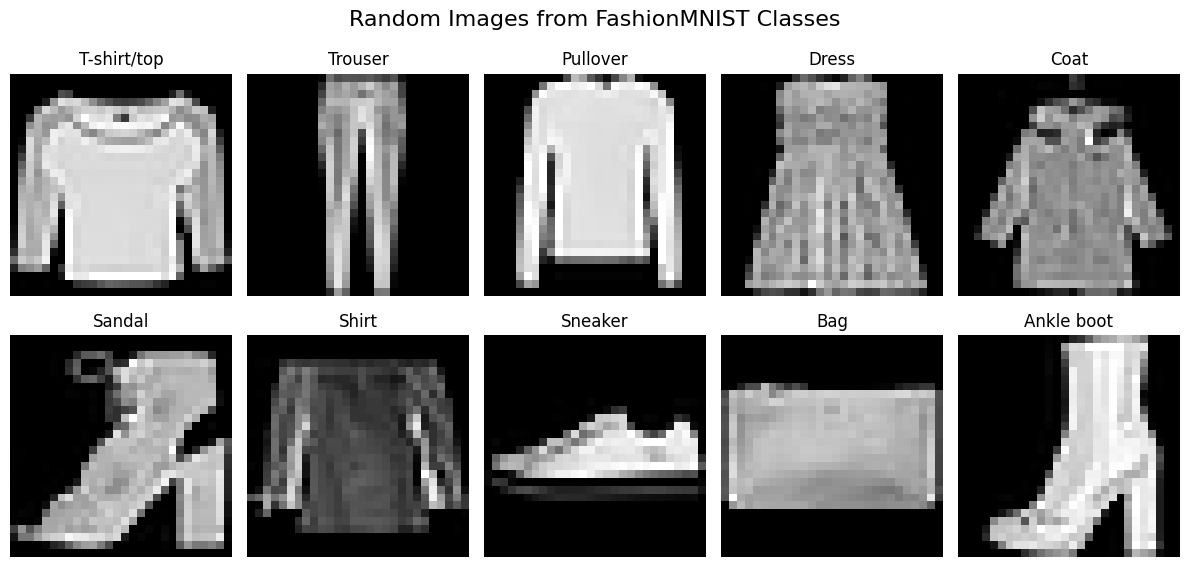

In [7]:
import random

fig, axs = plt.subplots(2, 5, figsize=(12, 6))
fig.suptitle("Random Images from FashionMNIST Classes", fontsize=16)
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]
# Get one random image per class
for i in range(len(class_names)):
    filtered_ds = train_set.data[train_set.targets == i]
    random_index = random.randint(0, len(filtered_ds) - 1)
    random_image = filtered_ds[random_index]

    # Plot the image
    ax = axs[i // 5, i % 5]
    ax.imshow(random_image, cmap="gray")
    ax.set_title(class_names[i])
    ax.axis("off")

plt.tight_layout()
plt.show()

## Initializing model's parameters

In this part, we create the model and initialize its parameters and store the values of these parameters in the variable `parameters` which is a dictionary including the weigths and biases of each layer.

In [8]:
def add_linear_layer(parameters: dict, shape, device, i=None):
    """
    This function adds parameters of a linear unit of shape `shape` to the `parameters` dictionary.
    """
    n_in, n_out = shape
    with torch.no_grad():
        w = torch.zeros(*shape, device=device)
        # kaiming initialization for ReLU activations:
        bound = 1 / np.sqrt(n_in).item()
        w.uniform_(-bound, bound)
        b = torch.zeros(n_out, device=device)  # no need to (1, n_out). it will broadcast itself.
    w.requires_grad = True
    b.requires_grad = True


    # `i` is used to give numbers to parameter names
    parameters.update({f'w{i}': w, f'b{i}': b})

Now we define our neural network with the given layers and add the weights and biases to the dictionary `parameters`. **You are allowed to modify the values of the layers**.

In [22]:
# input_dim : input dimention of the first layer, which you have calculated before.
layers = [
    (input_dim, 512),
    (512, 256),
    (256, 128),
    (128, 64),
    (64, num_classes)
]
num_layers = len(layers)
parameters = {}

# setting the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# adding the parameters to the dictionary
for i, shape in enumerate(layers):
    add_linear_layer(parameters, shape, device, i)

parameters.keys()

dict_keys(['w0', 'b0', 'w1', 'b1', 'w2', 'b2', 'w3', 'b3', 'w4', 'b4'])

## Defining the required functions

In this section, we should define the required functions. For each of these functions, the inputs and the desired outputs are given and you should write all or part of the function. **You are not allowed to use the activation functions and the loss functions implemented in torch**.

Computing affine and relu outputs:

In [10]:
def affine_forward(x, w, b):
    ## FILL HERE
    #x_reshaped = x.view(x.shape[0],-1).to(torch.float64)

    return torch.matmul(x, w) + b





def relu(x):
    ## FILL HERE
    out = torch.max(x,torch.zeros(x.shape,device=x.device))
    return out


Function `model` returns output of the whole model for the input `x` using the parameters:

In [21]:
def model(x: torch.Tensor, parameters, num_layers=num_layers):
    # number of batches
    B = x.shape[0]
    x = x.view(B, -1)
    ## FILL HERE
    layer_input = x

      # Forward pass through each layer
    for layer in range(0, num_layers ):
          # Get weight matrix and bias for this layer
          W = parameters[f"w{layer}"]
          b = parameters[f"b{layer}"]

          # Compute affine transformation
          output = affine_forward(layer_input, W, b)

          # Apply ReLU activation (except for the last layer)
          if layer+1 < num_layers:
              output = relu(output)


          # Update input for the next layer
          layer_input = output

    return output

Implementing cross entropy loss:

In [12]:
def manual_softmax(logits):
    """
    Computes the softmax probabilities manually.

    Args:
        logits (torch.Tensor): Predicted scores (logits) from the model.

    Returns:
        torch.Tensor: Softmax probabilities.
    """
    # Subtract the maximum value for numerical stability
    logits_exp = torch.exp(logits - torch.max(logits, dim=1, keepdim=True).values)

    # Compute the sum along the class dimension
    sum_exp = torch.sum(logits_exp, dim=1, keepdim=True)

    # Compute softmax probabilities
    probs = logits_exp / sum_exp

    return probs


def cross_entropy_loss(scores, y):
    """
    Computes the cross-entropy loss manually.

    Args:
        scores (torch.Tensor): Predicted scores (logits) from the model.
        y (torch.Tensor): Ground truth labels (class indices).

    Returns:
        torch.Tensor: Cross-entropy loss.
    """
    # Compute softmax probabilities manually
    n = len(y)
    probs = manual_softmax(scores)

    # Select the correct class probabilities using ground truth labels
    correct_probs = probs[torch.arange(len(y)), y]

    # Compute negative log likelihood (cross-entropy)
    loss = -torch.log(correct_probs).mean()

    return loss




Implementing a function for optimizing paramters and a function to zeroing out their gradients:

In [14]:
def sgd_optimizer(parameters: dict[str, torch.Tensor], learning_rate=0.001):
  '''This function gets the parameters and a learning rate. Then updates the parameters using their
  gradient. Finally, you should zero the gradients of the parameters after updating
  the parameter value.'''
  ## FILL HERE
  for param_name, param in parameters.items():
        # Assuming gradients are already computed (you can compute them elsewhere)
        grad = param.grad

        # Update the parameter using the gradient and learning rate
        param.data = param.data-learning_rate * grad

        # Zero out the gradients
        param.grad.zero_()




Training functions:

In [15]:
def accuracy(y_pred: np.ndarray, y_true: np.ndarray):
    ## FILL HERE
    assert len(y_pred) == len(y_true), "Input tensors must have the same length."

    # Convert tensors to numpy arrays for comparison
    y_pred_np = y_pred
    y_true_np = y_true

    # Count correct predictions
    correct = np.sum(y_pred == y_true).item()

    # Total number of samples
    total_samples = len(y_true)

    # Compute accuracy
    acc = correct / total_samples


    return acc

def train(train_loader, learning_rate=0.001, epoch=None):
    '''This function implements the training loop for a single epoch. For each batch you should do the following:
        1- Calculate the output of the model to the given input batch
        2- Calculate the loss based on the model output
        3- Update the gradients using backward method
        4- Optimize the model parameters using the sgd_optimizer function defined previously
        5- Print the train loss (Show the epoch and batch as well)
        '''
    train_loss = 0
    N_train = len(train_loader.dataset)

    # Creating empty lists Y and Y_pred to store the labels and predictions of each batch
    # for calculateing the accuracy later
    Y = []
    Y_pred = []


    for i, (x, y) in enumerate(train_loader):
        x = x.to(device)
        y = y.to(device)
        p = model(x, parameters)

        ## FILL HERE
        loss = cross_entropy_loss(p, y)

        # Update the gradients using backward method
        loss.backward()

        # Optimize the model parameters using the SGD optimizer
        sgd_optimizer(parameters, learning_rate)

        # Accumulate the loss
        train_loss += loss.item()

        y_pred = p.argmax(dim=-1)
        Y.append(y.cpu().numpy())
        Y_pred.append(y_pred.cpu().numpy())

    Y = np.concatenate(Y)
    Y_pred = np.concatenate(Y_pred)
    acc = accuracy(Y_pred, Y)
    print(f'Accuracy of train set: {acc}')
    #print(Y_pred.shape)

    train_loss /= len(Y_pred)
    return train_loss, acc


def validate(loader, epoch=None, set_name=None):
    '''This function validates the model on the test dataloader. The function goes through each batch and does
    the following on each batch:
        1- Calculate the model output
        2- Calculate the loss using the model output
        3- Print the loss for each batch and epoch

    Finally the function calculates the model accuracy.'''
    total_loss = 0
    N = len(loader.dataset)

    # Creating empty lists Y and Y_pred to store the labels and predictions of each batch
    # for calculateing the accuracy later
    Y = []
    Y_pred = []
    for i, (x, y) in enumerate(loader):
        x = x.to(device)
        y = y.to(device)
        p = model(x, parameters)

        ## FILL HERE
        loss = cross_entropy_loss(p, y)

        # Accumulate the loss
        total_loss += loss.item()
        #print(loss.item())


        y_pred = p.argmax(dim=-1)
        Y.append(y.cpu().numpy())
        Y_pred.append(y_pred.cpu().numpy())
    Y = np.concatenate(Y)
    Y_pred = np.concatenate(Y_pred)
    total_loss /= len(Y_pred)
    acc = accuracy(Y_pred, Y)
    print(f'Accuracy of {set_name} set: {acc}')

    return total_loss, acc,Y_pred

In [16]:
train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

In [23]:
def train_model(dataloaders, num_epochs, learning_rate=0.001, model_name='pytorch_model'):
    '''This function trains the model for the number of epochs given and stores, calculates and prints the train
    and test losses and accuracies. Finally, it plots the accuracy and loss history for training and test sets'''
    train_loader, test_loader = dataloaders
    train_losses = []
    test_losses = []
    train_accuracies = []
    test_accuracies = []
    for epoch in range(num_epochs):
        ## FILL HERE
        ## You should calculate the train and test loss and accuracies for each epoch and add them to
        ## the lists `train_losses`, `test_losses`, `train_accuracies` and `test_accuracies`
   # Train the model and calculate train loss and accuracy
        train_loss, train_acc = train(train_loader, learning_rate=learning_rate, epoch=epoch)
        train_losses.append(train_loss)
        train_accuracies.append(train_acc)

        # Validate the model on the test set and calculate test loss and accuracy
        test_loss, test_acc,Y_pred = validate(test_loader, epoch=epoch, set_name='test')
        test_losses.append(test_loss)
        test_accuracies.append(test_acc)

    ## plot the loss history of training and test sets
    ## FILL HERE

    ## plot the accuracy history of training and test sets
    ## FILL HERE
    plt.figure(figsize=(10, 5))
    plt.plot(range(num_epochs), train_losses, label='Train Loss', color='blue')
    plt.plot(range(num_epochs), test_losses, label='Test Loss', color='orange')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(f'{model_name} - Loss History')
    plt.legend()
    plt.show()

    # Plot the accuracy history of training and test sets
    plt.figure(figsize=(10, 5))
    plt.plot(range(num_epochs), train_accuracies, label='Train Accuracy', color='blue')
    plt.plot(range(num_epochs), test_accuracies, label='Test Accuracy', color='orange')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title(f'{model_name} - Accuracy History')
    plt.legend()
    plt.show()
    return test_accuracies



Accuracy of train set: 0.2179
Accuracy of test set: 0.3781
Accuracy of train set: 0.39093333333333335
Accuracy of test set: 0.3856
Accuracy of train set: 0.3639833333333333
Accuracy of test set: 0.3211
Accuracy of train set: 0.37223333333333336
Accuracy of test set: 0.4212
Accuracy of train set: 0.5346
Accuracy of test set: 0.5704
Accuracy of train set: 0.59375
Accuracy of test set: 0.6126
Accuracy of train set: 0.6355666666666666
Accuracy of test set: 0.6287
Accuracy of train set: 0.6765166666666667
Accuracy of test set: 0.6952
Accuracy of train set: 0.7130833333333333
Accuracy of test set: 0.7241
Accuracy of train set: 0.73825
Accuracy of test set: 0.7424
Accuracy of train set: 0.7574333333333333
Accuracy of test set: 0.7429
Accuracy of train set: 0.7724666666666666
Accuracy of test set: 0.758
Accuracy of train set: 0.7839833333333334
Accuracy of test set: 0.7787
Accuracy of train set: 0.7938166666666666
Accuracy of test set: 0.7664
Accuracy of train set: 0.8005666666666666
Accuracy 

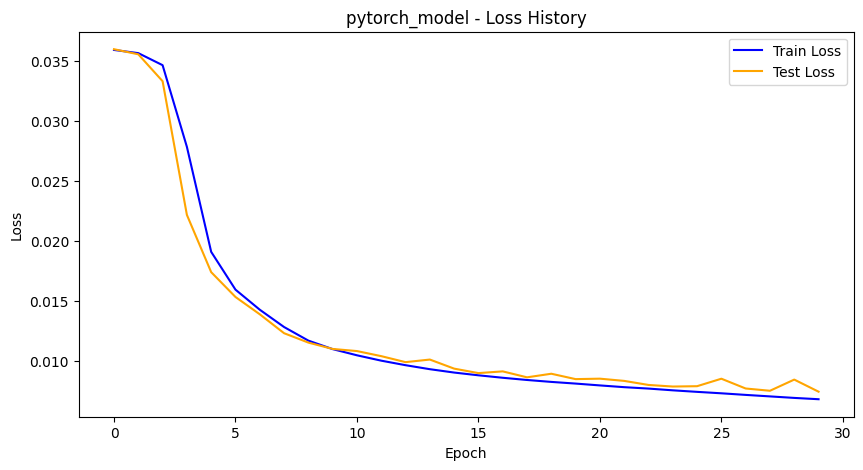

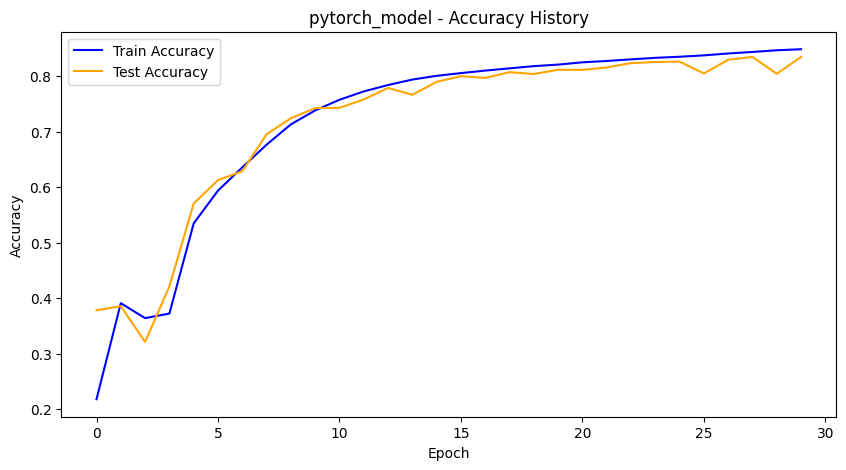

In [24]:
test_accuracies=train_model([train_loader, test_loader], num_epochs=30, learning_rate=0.003)

In [25]:
print(f'Final test accuracy: {test_accuracies[-1]}')

Final test accuracy: 0.8345


## Visualization of the labels and predictions

In this section, you should visual one image from each class and show both the actual label and the predicted label for that image.

In [26]:
## FILL HERE
check=False
classes_up_to_now=[]
images_to_show=[]
predicted_labels=[]

for batch_idx, (images, labels) in enumerate(train_loader):
    # 'images' contains the batch of data (e.g., 64 images)
    # 'labels' contains the corresponding labels (e.g., 64 labels)
    p = model(images, parameters)
    y_pred2 = p.argmax(dim=-1)

    # You can access individual samples within the batch
    for sample_idx in range(len(images)):

        predicted=y_pred2[sample_idx]
        image = images[sample_idx]
        label = labels[sample_idx]
        print(predicted,label)
        if label not in classes_up_to_now:
          classes_up_to_now=classes_up_to_now+[label]
          images_to_show=images_to_show+[image]
          predicted_labels=predicted_labels+[predicted]

        if(len(classes_up_to_now)==10):
          check=True
        if(check):
          break
    if(check):
        break




tensor(9) tensor(9)
tensor(9) tensor(9)
tensor(3) tensor(3)
tensor(0) tensor(0)
tensor(8) tensor(9)
tensor(8) tensor(8)
tensor(7) tensor(7)
tensor(5) tensor(5)
tensor(9) tensor(9)
tensor(5) tensor(5)
tensor(0) tensor(6)
tensor(5) tensor(5)
tensor(2) tensor(2)
tensor(4) tensor(4)
tensor(1) tensor(1)


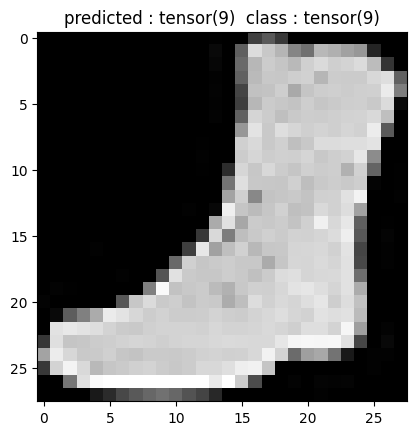

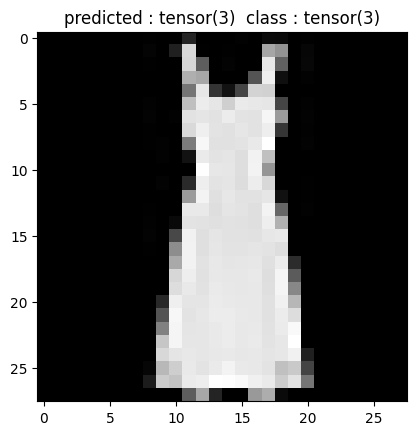

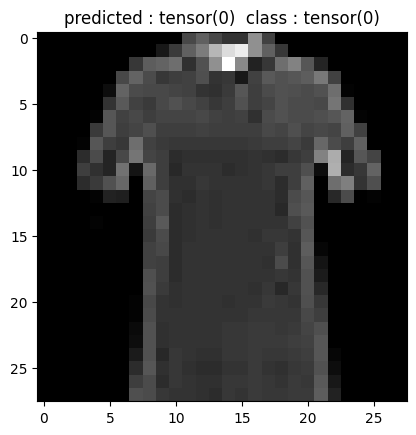

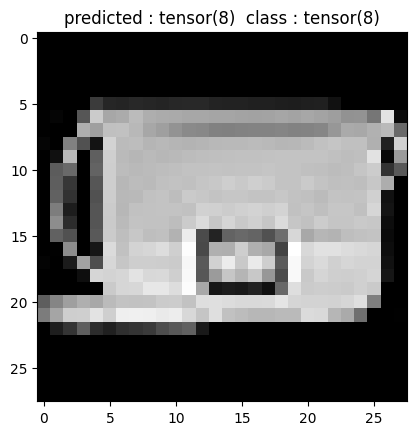

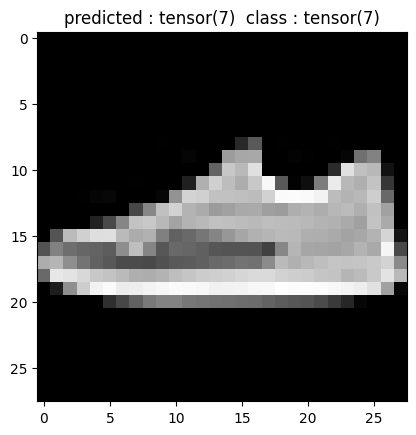

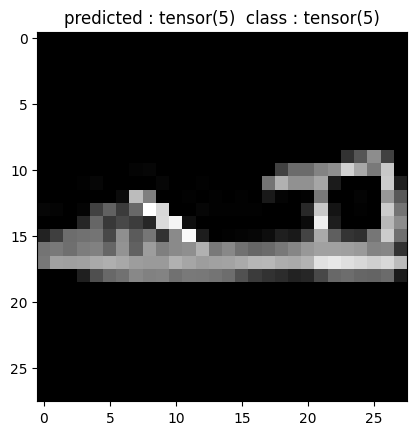

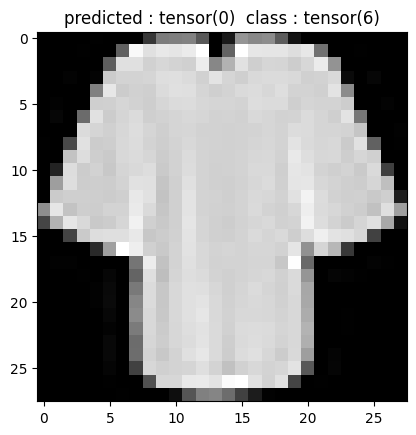

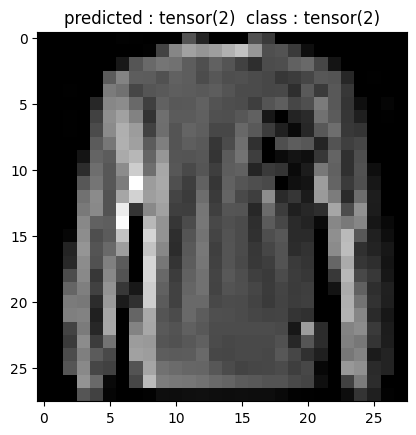

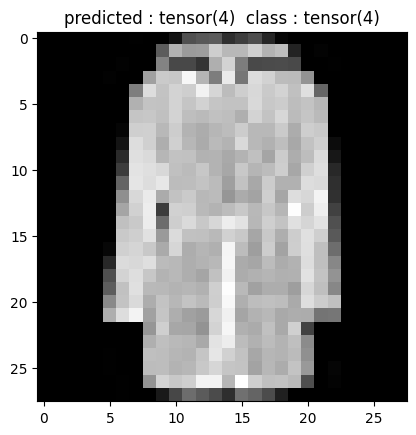

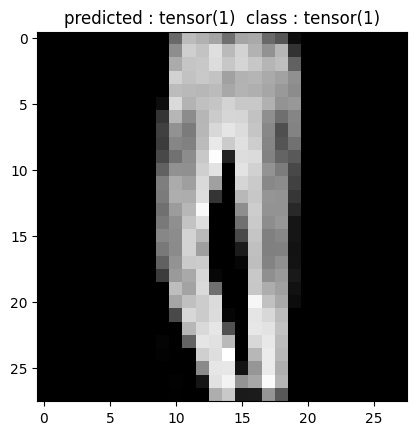

In [27]:
for i in range (len(images_to_show)):
  image=images_to_show[i].numpy()
  plt.figure()
  plt.imshow(image.reshape(28,28),cmap='gray')
  plt.title('predicted : '+str(predicted_labels[i])+'  class : '+str(classes_up_to_now[i]))